# CNN

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

# Load Dataset

In [6]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')
x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [12]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255;
y_train=y_train/255;

In [11]:
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)

shape of x_train (2000, 100, 100, 3)
shape of y_train (2000, 1)
shape of x_test (400, 100, 100, 3)
shape of y_test (400, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

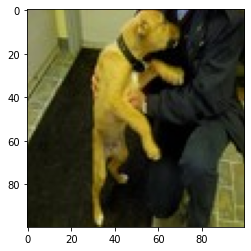

In [17]:
index=random.randint(0,len(x_train))
plt.imshow(x_train[index, :])
plt.show()

# Model

In [20]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [22]:
# optimizer=keras.optimizer.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 75s 2s/step - loss: 0.0427 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 66s 2s/step - loss: 0.0156 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 57s 2s/step - loss: 0.0145 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 50s 2s/step - loss: 0.0143 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 52s 2s/step - loss: 0.0141 - accuracy: 0.5000


In [24]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 4s 187ms/step - loss: 412.3387 - accuracy: 0.5000


[412.33868408203125, 0.5]

# Making Predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


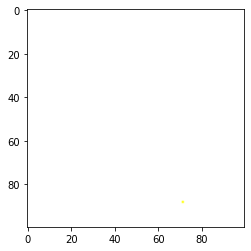

Predicted image is : dog


In [33]:
index2=random.randint(0,len(y_test))
plt.imshow(x_test[index2,:])
plt.show()

y_pred=model.predict(x_test[index2,:].reshape(1,100,100,3))

if(y_pred==0):
    pred='dog'
else:
    pred='cat'

print('Predicted image is :',pred)